# Quick Start

This notebook shows how to use GLAFT to calculate and visualize the metrics presented in the study "Statistics and flow dynamics based assessments of feature-tracked glacier velocities derived from satellite images."

## Input file format

To begin, you have to acquire the following files:

1. **Velocity map as two files**; one showing the $V_x$ component and the other showing the $V_y$ component. GLAFT accepts any format readable by the Python rasterio package, abd we recommend using GeoTiff as the preferred velocity map format.

2. **Polygon geometries indicating static terrain or ice flow locations**. We have tested ESRI shapefile as the geometry format. The geometries will be parsed by the Python geopandas module, and the other compatible formats should work too (such as geopackage or geojson, although not tested). Polygon geometries should use the same coordinate reference system (CRS) from the velocity maps 

## Procedure

First, import the GLAFT module:

In [9]:
import glaft

And specify the input velocity maps and polygon geometries. We use one of the test pairs presented in the previously mentioned study as a demo example: Kaskawulsh glacier velocity between March 4 and April 5, 2018, processed with the CARST software with the following key parameters. More details are available in the study.

- Matching template size: 64 pixels (960 m)
- Output resolution (aka skip size): 4 pixels (60 m) 
- Pre-processing filter: Gaussian filter 

In [15]:
vx = 'demo-data/20180304-20180405_velo-raw_vx.tif'
vy = 'demo-data/20180304-20180405_velo-raw_vy.tif'
static_area  = 'demo-data/bedrock_V2.shp'
iceflow_area = 'demo-data/glacier_V1_Kaskawulsh_s_inwardBuffer600m.shp'

### Checking input files

GLAFT has a function called `show_velocomp` to visualize the input raster. 

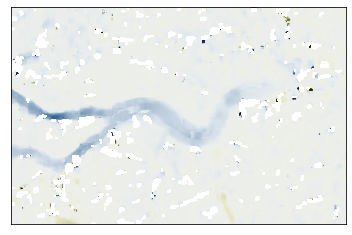

In [5]:
glaft.show_velocomp(vx);

We can use the `prep_colorbar_mappable` function to prepare and show colorbar.

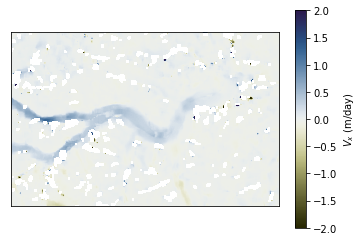

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
cm_settings = glaft.show_velocomp(vx, ax=ax)
mappable = glaft.prep_colorbar_mappable(**cm_settings)
fig.colorbar(mappable, label='$V_x$ (m/day)');

GLAFT does not provide functions to visualize and check the polygon geometries, but one can use geopandas to achieve that.

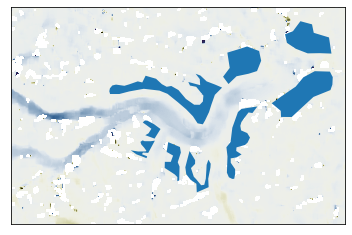

In [19]:
import geopandas as gpd

fig, ax = plt.subplots(1, 1)
_ = glaft.show_velocomp(vx, ax=ax)

polygons = gpd.read_file(static_area)
polygons.plot(ax=ax);

### Metric 1: Correct-match uncertainty on static terrains

To calculate metrics, we first construct a `glaft.Velocity` object with all necessary files as arguments.